## Arboles de Decisiones

Los Arboles de Decisiones son un algorimto de _**aprendizaje supervisado**_. En un _Arbol de Decision_, hay dos nodos, que son el _**nodo de decision**_ y el _**nodo hoja**_. Los _nodos de decision_ se utilizan para tomar cualquier decision y tienen multiples ramas, mientras que los _nodos hoja_ son el resultado de esas decisiones y no contienen más ramas. <br>

Las decisiones o la prueba se realiza sobre a base de las caracteristicas del conjunto dado. <br>

Para construir un árbol, se utiliza el algoritmo CART (algoritmo de árbol de clasificación y regresión). <br>

Al igual que los _SVMs_(Supported Vector Machine), los _**Arboles de Decision**_ (Decision Trees) son algoritmos de Machine Learning versatiles que pueden desempeñar tareas de _clasificacion_ y _regresion_, e incluso tareas _multioutput_. <br>

Los _Arboles de Decisiones_ son tambien un parte fundamental del algoritmo _Random Forest_, el cual se ecunetra entre los algoritmos mas poderosos de Machine Learning hoy en dia. <br>

<!-- ![Decision Tree struct](./terminology.png) -->

<div>
    <center>
        <img src="./terminology.png" width="1000"/>
    </center>
</div>

#### ¿Por qué utilizar Árboles de Decisiones?

Existen muchos algoritmos de ML y escoger uno adecuado para el problema a resolver, es un punto crucial. Aqui un par de razones para usar un Árbol de Decisión:
- Suelen imitar la capacidad de pensamiento humano al tomar una decisión, por lo que son faciles de entender.
- La lógica del mismo puede entenderse fácilmente porque muestra una estructura similar a la de un árbol.

#### Terminología de los Árboles de Decisiones.

- _**Nodo raiz**_: Punto de partida del Árbol de decisión. Representa a todo el conjunto de datos que a su vez se divide en dos o mas conjuntos homogéneos.
- _**Nodo hoja**_: Es el nodo de salida final, y el árbol no se puede segregar más.
- _**División**_: Proceso de dividir el nodo decisión/nodo raíz en subnodos según las condiciones dadas.
- _**Rama/Subárbol**_: Un arbol formado por la division del árbol.
- _**Poda**_: Proceso de eliminar las ramas no deseadas.
- _**Nodo padre/hijo**_: El nodo raíz del árbol se llama nodo padre, y los demás nodos se llaman nodos hijo.

#### Entrenamiento y visualizacion de un _Arbol de Desicion_.

In [6]:
# Importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Convirtiendo dict data a DataFrame
iris = load_iris()
print(iris.keys())

# Eligiendo columnas de interes.
columns = iris.feature_names + ['target']
print(columns)
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=columns)
iris_df.describe()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
# Dividiendo data set en conjunto de entrenamiento y prueba 
# NOTA: Para este caso al ser tan pocos datos, usaremos todos para el entrenamiento.

X_train = iris_df[['petal length (cm)', 'petal width (cm)']]
Y_train = iris_df['target']

In [4]:
# Instanciando modelo
tree_clf = DecisionTreeClassifier(max_depth=2)

# Ajustando modelo
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [7]:
# Exportando modelo como una imagen
dotfile = open("./iris_tree.dot", "w")
tree.export_graphviz(
    tree_clf,
    out_file=dotfile,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)
dotfile.close()

In [8]:
# Convirtiendo archivo .dot a .png
from subprocess import check_call
check_call(['dot','-Tpng', "./iris_tree.dot",'-o',"./iris_tree.png"])

0

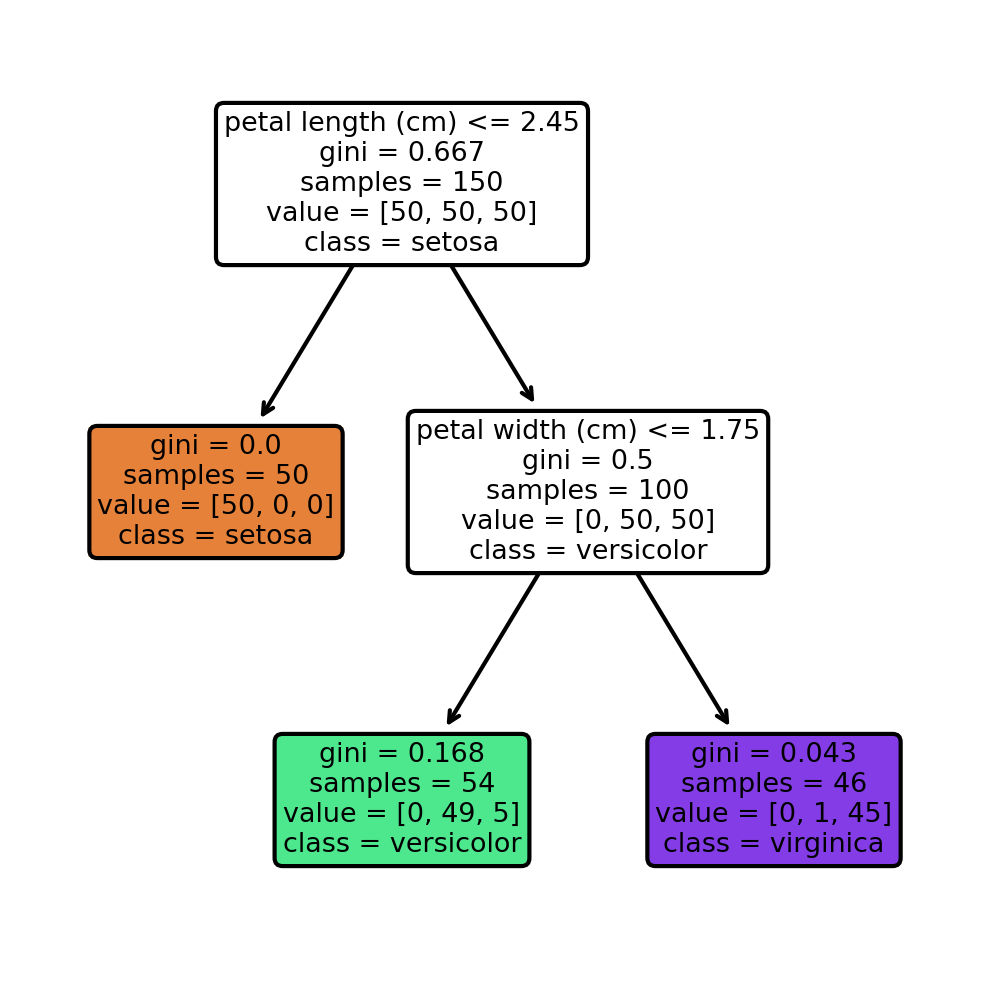

In [13]:
# Otra forma de visualizar el arbol.
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(tree_clf,
               feature_names=iris.feature_names[2:], 
               class_names=['setosa', 'versicolor', 'virginica'],
               rounded=True,
               filled = True)
fig.savefig('./plottreefncn.png')

#### Haciendo predicciones

Supongamos que encontramos una flor Iris y queremos clasificarla. Empezaria por el _nodo raiz_ (**root node**, profundidad 0, al inicio): aqui el nodo preguntaria si la longitud del pétalo de la flor es menor que 2,45 cm. Si lo es, entonces se mueve al _nodo hijo_ de la izquierda (profundidad 1, izquierda). En este caso, es un _nodo hoja_ (**leaf node**, lo cual indica que no tiene mas nodos hijos), entonces el Arbol de Decision habra predicho que la flor es una Iris-Setosa(_**class = setosa**_). <br>

Supongamos que encontramos otra flor, pero esta vez la longitud del petalo es mayor a 2.45 cm. Ahora nos tendremos que mover al _nodo hijo_ de la derecha (profundidad 1, derecha), el cual no es un nodo hoja, es un _nodo de decision_ (**decision node**), por lo que se hace otra pregunta: ¿es el ancho del petalo mas chico de 1.75 cm? Si lo es, entonces la flor es mas como una Iris-Versicolor (profundidad 2, izquierda). Sino, es como una Iris-Virginica (profundidad 2, derecha).

_**Nota**_: Una de las muchas cualidades de los árboles de decisión es que requieren muy poca preparación de datos. En particular, no requieren escalamiento ni centrado de funciones en absoluto. 

El atributo _**samples**_ de un nodo cuenta a cuántas instancias de entrenamiento se aplica. Por ejemplo, 100 instancias de entrenamiento tiene un a longitud de petalo mas grande que 2.45 cm (profundidad 1, derecha), de los cuales 54 tienen un ancho de petalo menor a 1.75 cm (profundidad 2, izquierda). El atributo _**value**_ de un nodo nos dice a cuantas instancias de entrenamiento de cada clase se aplica este nodo: por ejemplo, el nodo del fondo a la derecha aplica 0 Iris-Setosa, 1 Iris-Versicolo y 45 Iris-Virginica. Finalmente el atributo _**gini**_ del nodo mide la _impuresa_ (impurity): un nodo es "puro" ($\;gini=0\;$) si todas las instancias de entrenamiento a las que se aplica pertenecen a la misma clase. La ecuacion  _Gini Impurity_ ($\; G_{i} \;$) muestra como el algoritmo de entrenamiento calcula la puntiación _gini_. Por ejemplo, el nodo izquierdo con profundidad 2 tiene un $\;gini = 1 - (0/54)^{2} - (49/54)^{2} - (5/54)^{2} \approx 0.168\;$.  
$$ 
    Gini\; impurity\\

    G_{i} = 1 - \sum \limits_{k=1}^{n} p_{i,k}^{2}

$$

Donde:
- $\; p_{i,k}^{2} \;$ es la proporción de instancias de clase k entre las instancias de entrenamiento en el iésimo nodo.